Text(0, 0.5, '$V_{pcc}$ [p.u.]')

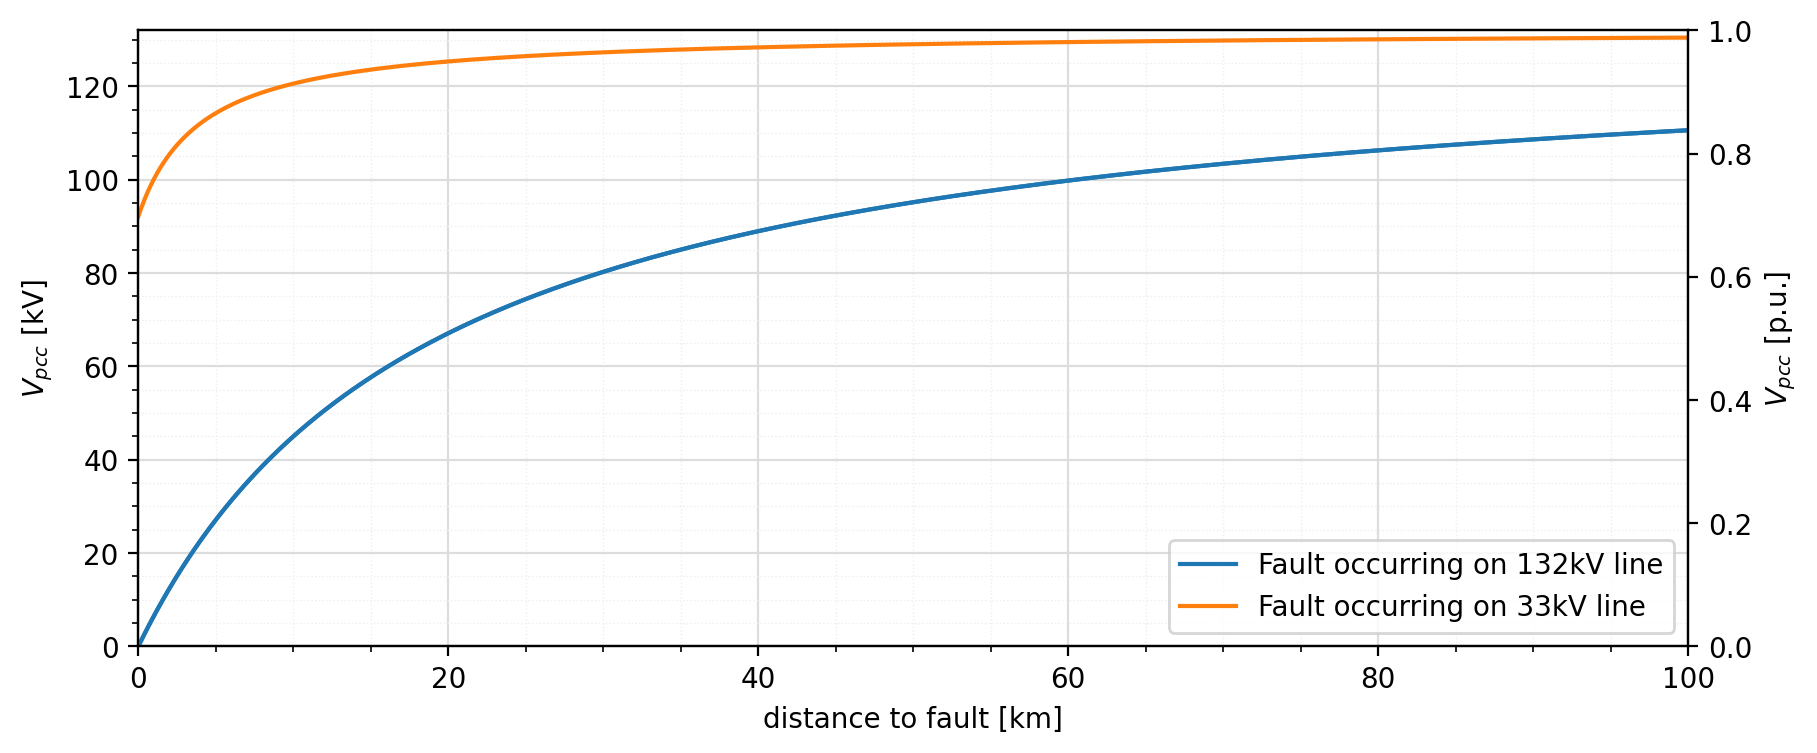

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(figsize=(10, 4))
ax.grid(which="major", color="#DDDDDD", linewidth=0.8)
ax.grid(which="minor", color="#EEEEEE", linestyle=":", linewidth=0.5)
ax.minorticks_on()

ax2 = ax.twinx()

d = np.arange(0, 100, 0.1)
v_pcc = (0.3 * d) / (0.3 * d + 5.8) * 132

v_pcc_2 = (13.4 + 4.8 * d) / (13.4 + 4.8 * d + 5.8) * 132

ax.plot(d, v_pcc, label="Fault occurring on 132kV line")
ax.plot(d, v_pcc_2, label="Fault occurring on 33kV line")
ax2.plot(
    d,
    v_pcc / 132,
)
ax.set_xlim(0, 100)
ax.set_ylim(0, 132)
ax2.set_ylim(0, 1)
ax.set_xlabel("distance to fault [km]")
ax.legend()
ax.set_ylabel("$V_{pcc}$ [kV]")
ax2.set_ylabel("$V_{pcc}$ [p.u.]")

Text(0, 0.5, '$V_{load}$ [p.u.]')

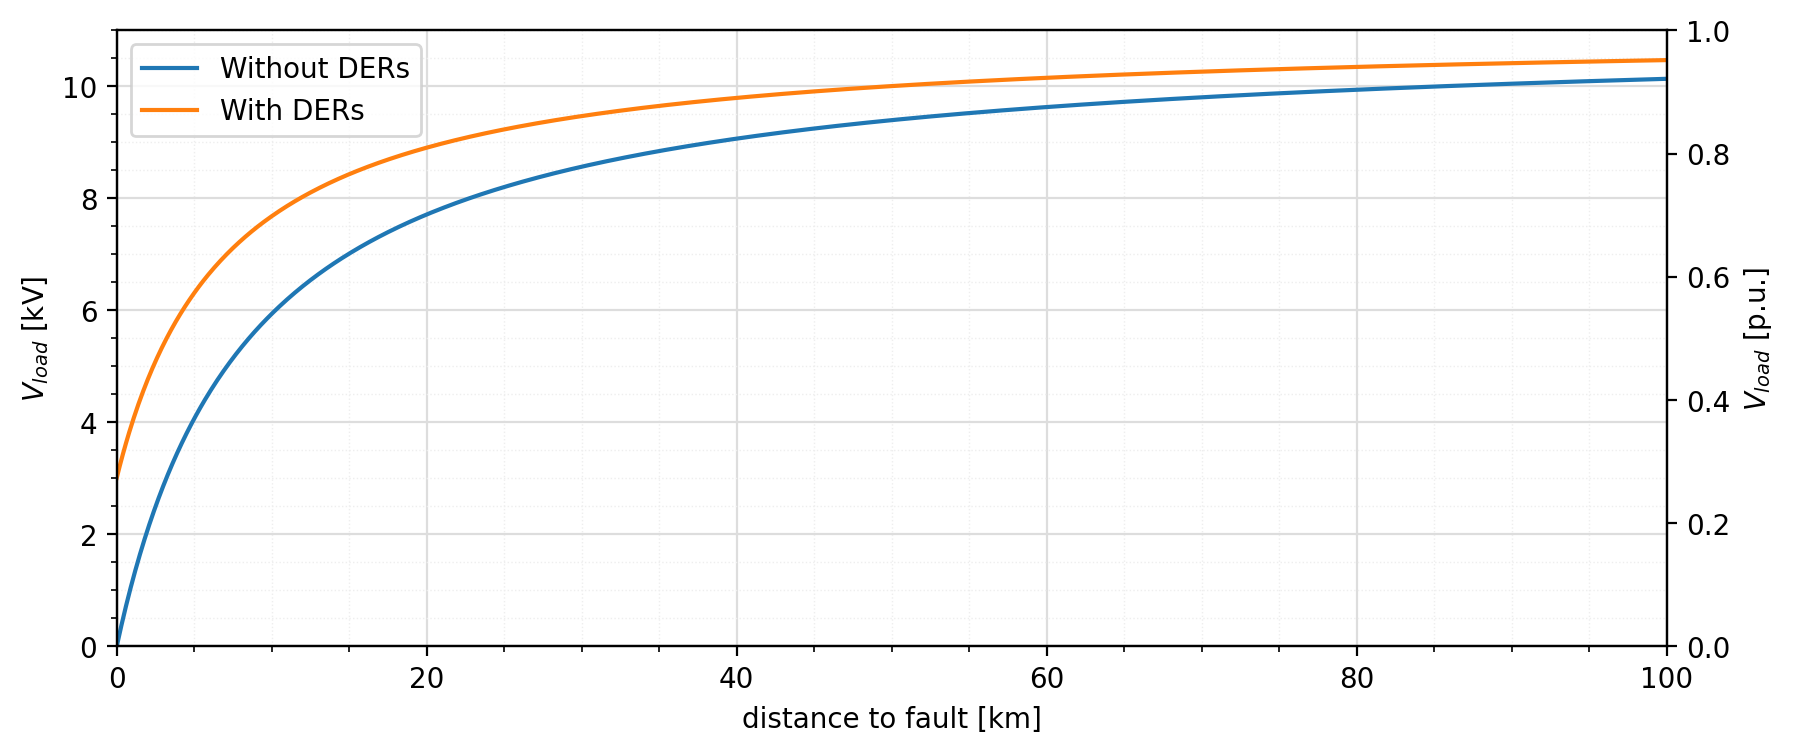

In [3]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.grid(which="major", color="#DDDDDD", linewidth=0.8)
ax.grid(which="minor", color="#EEEEEE", linestyle=":", linewidth=0.5)
ax.minorticks_on()

ax2 = ax.twinx()

d_arr = np.arange(0, 100, 0.1)
v_load = (0.008333 * d_arr) / (0.008333 * d_arr + 0.071) * 11


def parallel(z1, z2):
    return (z1 * z2) / (z1 + z2)


z_der = 1.03 / 2
z_xeq = 0.097
z_s = 0.071


def z_f(d):
    return 0.008333 * d


def v_load_der(d):
    z_intermediate = parallel(z_der, z_xeq + parallel(z_s, z_f(d)))
    return 11 * z_intermediate / (z_der + z_intermediate)


def v_load_inf(d):
    z_ders = parallel(z_der, z_der)
    z_a = z_ders / (z_ders + z_xeq)
    z_b = parallel(z_xeq + z_ders, z_f(d))
    z_c = z_b / (z_s + z_b)

    return 11 * z_a * z_c


def v_load_total(d):
    return v_load_der(d) + v_load_der(d) + v_load_inf(d)


ax.plot(d_arr, v_load, label="Without DERs")
ax.plot(d_arr, v_load_total(d_arr), label="With DERs")
# ax.plot(d, v_load_2, label="Fault occurring on 33kV line")
# ax2.plot(d, v_load / 11,)
ax.set_xlim(0, 100)
ax.set_ylim(0, 11)
ax.set_xlabel("distance to fault [km]")
ax.legend()
ax.set_ylabel("$V_{load}$ [kV]")
ax2.set_ylim(0, 1)
ax2.set_ylabel("$V_{load}$ [p.u.]")

Text(0, 0.5, '$V_{load}$ [kV]')

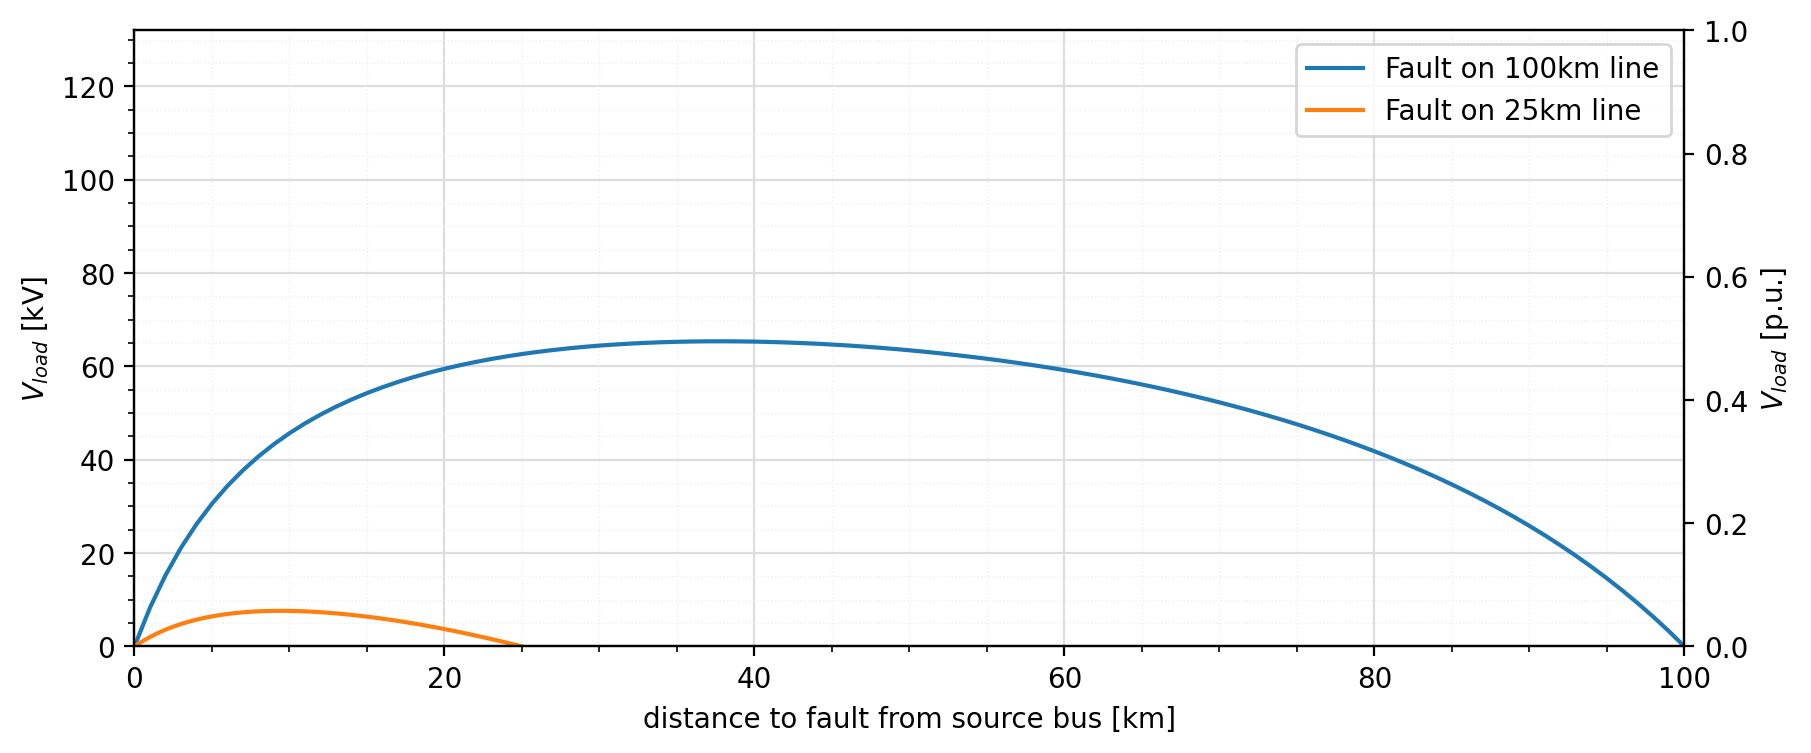

In [4]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.grid(which="major", color="#DDDDDD", linewidth=0.8)
ax.grid(which="minor", color="#EEEEEE", linestyle=":", linewidth=0.5)
ax.minorticks_on()

z_f = 0.3  # ohm/km
z_s = 3.48


def z_r(p, l1, l2):
    return (1 - p) * l1 * z_f + l2 * z_f


def v_a(p, l1, l2):
    z_top = parallel(z_r(p, l1, l2), (p * l1 * z_f))

    return 132 * z_top / (z_top + z_s)


def v_l(p, l1, l2):
    z_top = (1 - p) * l1 * z_f

    z = z_top / z_r(p, l1, l2)

    return v_a(p, l1, l2) * z


ratios = np.arange(0, 1.01, 0.01)

v_fault_on_100 = [v_l(r, 100, 25) for r in ratios]
v_fault_on_25 = [v_l(r, 25, 100) for r in ratios]


ax.plot(ratios * 100, v_fault_on_100, label="Fault on 100km line")
ax.plot(ratios * 25, v_fault_on_25, label="Fault on 25km line")
ax.set_ylim(0, 132)
ax.legend()

ax2 = ax.twinx()
ax.set_xlabel("distance to fault from source bus [km]")
ax.set_xlim(0, 100)
ax2.set_ylim(0, 1)
ax2.set_ylabel("$V_{load}$ [p.u.]")
ax.set_ylabel("$V_{load}$ [kV]")

In [19]:
Y = np.array(
    [
        [2.563, -0.9, -0.621, 0, 0],
        [-0.9, 4.589, 0, 0, -1.25],
        [-0.621, 0, 2.05, -1.429, 0],
        [0, 0, -1.429, 2.9, -1.471],
        [0, -1.25, 0, -1.471, 2.721],
    ]
)

Z = np. linalg.inv(Y)

print(Z)


[[0.54648133 0.17653401 0.38929315 0.32098394 0.2546251 ]
 [0.17653401 0.33458449 0.24368862 0.27287197 0.30122208]
 [0.38929315 0.24368862 1.25352431 0.92930286 0.61433858]
 [0.32098394 0.27287197 0.92930286 1.19365978 0.77065913]
 [0.2546251  0.30122208 0.61433858 0.77065913 0.92251642]]
